# Weather Data Aggregator

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("C:/Users/NishaEzhil/Downloads/Wheather.zip")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [8]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [12]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [13]:
data.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [22]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Year'] = data['Formatted Date'].dt.year


In [23]:
data['Formatted Date'].dt.tz_localize(None)

0       2006-03-31 22:00:00
1       2006-03-31 23:00:00
2       2006-04-01 00:00:00
3       2006-04-01 01:00:00
4       2006-04-01 02:00:00
                ...        
96448   2016-09-09 17:00:00
96449   2016-09-09 18:00:00
96450   2016-09-09 19:00:00
96451   2016-09-09 20:00:00
96452   2016-09-09 21:00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns]

In [24]:
data['Year'] = data['Formatted Date'].dt.year


 Average temperature by year
 Total rainfall by year

In [ ]:
avg_temp_by_year = data.groupby('Year')['Temperature (C)'].mean().reset_index()
total_rain_by_year = data.groupby('Year')['Precip Type'].sum().reset_index() 

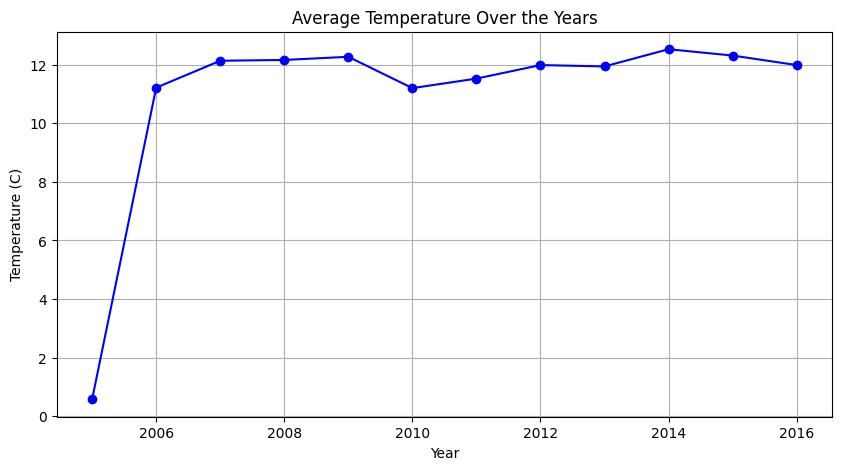

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(avg_temp_by_year['Year'], avg_temp_by_year['Temperature (C)'], marker='o', color='blue', label='Avg Temp')
plt.title('Average Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.grid(True)
plt.show()
